In [1]:
import torch
import numpy as np

from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 190),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(190, 1))
    def forward(self, x):
        output = self.regressor(x)
        return output
    

(2500,)


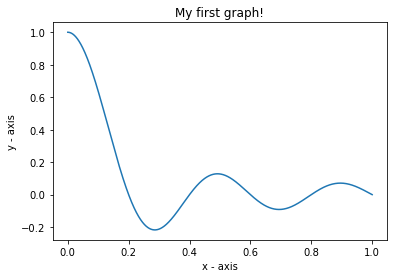

In [3]:
step = 0.1
X = np.linspace(1e-4, 1, 2500) 
y = np.sin(5*np.pi*X) / (5*np.pi*X)

import matplotlib.pyplot as plt
plt.plot(X, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()



In [4]:
LR = 1e-4
MAX_EPOCH = 20000
BATCH_SIZE = 512

X_train, X_val, y_train, y_val = map(torch.tensor, train_test_split(X, y, test_size=0.2))
#X_train=torch.tensor(X)
#y_train=torch.tensor(y)
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=BATCH_SIZE,
                              pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=BATCH_SIZE,
                            pin_memory=True, shuffle=True)






In [26]:
def returnLossPredictedOp(model, train_dataloader, val_dataloader):
    optimizer = optim.Adam(model.parameters(), lr=LR)
    criterion = nn.MSELoss()
    
    # training loop
    train_loss_list = list()
    val_loss_list = list()
    actual_x=[]
    predicted_y=[]
    org_y=[]
    grad_norm=[]
    for epoch in range(20):
        print("epoch %d / %d" % (epoch+1, MAX_EPOCH))
        model.train()
        actual_x=[]
        predicted_y=[]
        org_y=[]
        # training loop
        temp_loss_list = list()
        for X_train, y_train in train_dataloader:
            X_train = X_train.type(torch.float32).to(device)
            y_train = y_train.type(torch.float32).to(device)

            optimizer.zero_grad()

            score = model(X_train)

            actual_x.append(X_train.detach().cpu().numpy())
            predicted_y.append(score.detach().cpu().numpy())
            org_y.append(y_train.detach().cpu().numpy())

            loss = criterion(input=score, target=y_train)
            #loss.requires_grad = True
            loss.backward()

            optimizer.step()

            temp_loss_list.append(loss.detach().cpu().numpy())

        train_loss_list.append(np.average(temp_loss_list))
        grad_all=0
        for p in model.parameters():
            grad=0
            if p.grad is not None:
                grad=(p.grad.cpu().data.numpy()**2).sum()
            grad_all+=grad
            
        grad_norm.append(grad_all**0.5)
        # validation
        model.eval()

        temp_loss_list = list()

        for X_val, y_val in val_dataloader:
            X_val = X_val.type(torch.float32).to(device)
            y_val = y_val.type(torch.float32).to(device)

            score = model(X_val)        
            loss = criterion(input=score, target=y_val)

            temp_loss_list.append(loss.detach().cpu().numpy())

        val_loss_list.append(np.average(temp_loss_list))

        print("\ttrain loss: %.5f" % train_loss_list[-1])
        print("\tval loss: %.5f" % val_loss_list[-1])
    
    return actual_x, org_y, predicted_y, train_loss_list, val_loss_list, grad_norm





In [6]:
model1 = SineApproximator().to(device)
ac_x_1, ac_y_1, p_y_1, t_ls_1, v_ls_1, grad_norm = returnLossPredictedOp(model1, train_dataloader, val_dataloader)



epoch 1 / 20000
	train loss: 0.20404
	val loss: 0.18863
epoch 2 / 20000
	train loss: 0.19107
	val loss: 0.17623
epoch 3 / 20000
	train loss: 0.17862
	val loss: 0.16480
epoch 4 / 20000
	train loss: 0.16684
	val loss: 0.15437
epoch 5 / 20000
	train loss: 0.15670
	val loss: 0.14496
epoch 6 / 20000
	train loss: 0.14834
	val loss: 0.13660
epoch 7 / 20000
	train loss: 0.13932
	val loss: 0.12915
epoch 8 / 20000
	train loss: 0.13211
	val loss: 0.12266
epoch 9 / 20000
	train loss: 0.12558
	val loss: 0.11702
epoch 10 / 20000
	train loss: 0.12036
	val loss: 0.11217
epoch 11 / 20000
	train loss: 0.11564
	val loss: 0.10803
epoch 12 / 20000
	train loss: 0.11123
	val loss: 0.10452
epoch 13 / 20000
	train loss: 0.10802
	val loss: 0.10155
epoch 14 / 20000
	train loss: 0.10488
	val loss: 0.09904
epoch 15 / 20000
	train loss: 0.10234
	val loss: 0.09691
epoch 16 / 20000
	train loss: 0.10011
	val loss: 0.09508
epoch 17 / 20000
	train loss: 0.09831
	val loss: 0.09351
epoch 18 / 20000
	train loss: 0.09630
	v

	train loss: 0.04984
	val loss: 0.04934
epoch 146 / 20000
	train loss: 0.04980
	val loss: 0.04921
epoch 147 / 20000
	train loss: 0.04964
	val loss: 0.04909
epoch 148 / 20000
	train loss: 0.04947
	val loss: 0.04896
epoch 149 / 20000
	train loss: 0.04932
	val loss: 0.04884
epoch 150 / 20000
	train loss: 0.04942
	val loss: 0.04872
epoch 151 / 20000
	train loss: 0.04906
	val loss: 0.04860
epoch 152 / 20000
	train loss: 0.04918
	val loss: 0.04848
epoch 153 / 20000
	train loss: 0.04908
	val loss: 0.04836
epoch 154 / 20000
	train loss: 0.04876
	val loss: 0.04824
epoch 155 / 20000
	train loss: 0.04873
	val loss: 0.04812
epoch 156 / 20000
	train loss: 0.04842
	val loss: 0.04800
epoch 157 / 20000
	train loss: 0.04841
	val loss: 0.04789
epoch 158 / 20000
	train loss: 0.04820
	val loss: 0.04777
epoch 159 / 20000
	train loss: 0.04821
	val loss: 0.04765
epoch 160 / 20000
	train loss: 0.04812
	val loss: 0.04754
epoch 161 / 20000
	train loss: 0.04793
	val loss: 0.04742
epoch 162 / 20000
	train loss: 0

	train loss: 0.03509
	val loss: 0.03475
epoch 293 / 20000
	train loss: 0.03507
	val loss: 0.03467
epoch 294 / 20000
	train loss: 0.03500
	val loss: 0.03459
epoch 295 / 20000
	train loss: 0.03485
	val loss: 0.03451
epoch 296 / 20000
	train loss: 0.03490
	val loss: 0.03443
epoch 297 / 20000
	train loss: 0.03481
	val loss: 0.03435
epoch 298 / 20000
	train loss: 0.03468
	val loss: 0.03427
epoch 299 / 20000
	train loss: 0.03455
	val loss: 0.03419
epoch 300 / 20000
	train loss: 0.03447
	val loss: 0.03411
epoch 301 / 20000
	train loss: 0.03447
	val loss: 0.03403
epoch 302 / 20000
	train loss: 0.03437
	val loss: 0.03395
epoch 303 / 20000
	train loss: 0.03430
	val loss: 0.03388
epoch 304 / 20000
	train loss: 0.03412
	val loss: 0.03380
epoch 305 / 20000
	train loss: 0.03411
	val loss: 0.03372
epoch 306 / 20000
	train loss: 0.03393
	val loss: 0.03364
epoch 307 / 20000
	train loss: 0.03396
	val loss: 0.03356
epoch 308 / 20000
	train loss: 0.03385
	val loss: 0.03349
epoch 309 / 20000
	train loss: 0

	train loss: 0.02489
	val loss: 0.02446
epoch 439 / 20000
	train loss: 0.02485
	val loss: 0.02440
epoch 440 / 20000
	train loss: 0.02474
	val loss: 0.02434
epoch 441 / 20000
	train loss: 0.02469
	val loss: 0.02428
epoch 442 / 20000
	train loss: 0.02461
	val loss: 0.02421
epoch 443 / 20000
	train loss: 0.02457
	val loss: 0.02415
epoch 444 / 20000
	train loss: 0.02451
	val loss: 0.02409
epoch 445 / 20000
	train loss: 0.02439
	val loss: 0.02403
epoch 446 / 20000
	train loss: 0.02442
	val loss: 0.02397
epoch 447 / 20000
	train loss: 0.02427
	val loss: 0.02390
epoch 448 / 20000
	train loss: 0.02425
	val loss: 0.02384
epoch 449 / 20000
	train loss: 0.02417
	val loss: 0.02378
epoch 450 / 20000
	train loss: 0.02409
	val loss: 0.02372
epoch 451 / 20000
	train loss: 0.02399
	val loss: 0.02365
epoch 452 / 20000
	train loss: 0.02399
	val loss: 0.02359
epoch 453 / 20000
	train loss: 0.02392
	val loss: 0.02353
epoch 454 / 20000
	train loss: 0.02392
	val loss: 0.02347
epoch 455 / 20000
	train loss: 0

	train loss: 0.01662
	val loss: 0.01629
epoch 586 / 20000
	train loss: 0.01651
	val loss: 0.01624
epoch 587 / 20000
	train loss: 0.01647
	val loss: 0.01619
epoch 588 / 20000
	train loss: 0.01642
	val loss: 0.01615
epoch 589 / 20000
	train loss: 0.01639
	val loss: 0.01610
epoch 590 / 20000
	train loss: 0.01637
	val loss: 0.01605
epoch 591 / 20000
	train loss: 0.01631
	val loss: 0.01601
epoch 592 / 20000
	train loss: 0.01625
	val loss: 0.01596
epoch 593 / 20000
	train loss: 0.01620
	val loss: 0.01591
epoch 594 / 20000
	train loss: 0.01615
	val loss: 0.01587
epoch 595 / 20000
	train loss: 0.01612
	val loss: 0.01582
epoch 596 / 20000
	train loss: 0.01607
	val loss: 0.01578
epoch 597 / 20000
	train loss: 0.01601
	val loss: 0.01573
epoch 598 / 20000
	train loss: 0.01599
	val loss: 0.01569
epoch 599 / 20000
	train loss: 0.01592
	val loss: 0.01564
epoch 600 / 20000
	train loss: 0.01588
	val loss: 0.01560
epoch 601 / 20000
	train loss: 0.01582
	val loss: 0.01555
epoch 602 / 20000
	train loss: 0

	train loss: 0.01078
	val loss: 0.01075
epoch 736 / 20000
	train loss: 0.01075
	val loss: 0.01072
epoch 737 / 20000
	train loss: 0.01073
	val loss: 0.01070
epoch 738 / 20000
	train loss: 0.01069
	val loss: 0.01067
epoch 739 / 20000
	train loss: 0.01066
	val loss: 0.01064
epoch 740 / 20000
	train loss: 0.01064
	val loss: 0.01061
epoch 741 / 20000
	train loss: 0.01062
	val loss: 0.01059
epoch 742 / 20000
	train loss: 0.01057
	val loss: 0.01056
epoch 743 / 20000
	train loss: 0.01055
	val loss: 0.01054
epoch 744 / 20000
	train loss: 0.01053
	val loss: 0.01051
epoch 745 / 20000
	train loss: 0.01053
	val loss: 0.01048
epoch 746 / 20000
	train loss: 0.01050
	val loss: 0.01046
epoch 747 / 20000
	train loss: 0.01046
	val loss: 0.01043
epoch 748 / 20000
	train loss: 0.01041
	val loss: 0.01041
epoch 749 / 20000
	train loss: 0.01040
	val loss: 0.01038
epoch 750 / 20000
	train loss: 0.01037
	val loss: 0.01035
epoch 751 / 20000
	train loss: 0.01032
	val loss: 0.01033
epoch 752 / 20000
	train loss: 0

	train loss: 0.00768
	val loss: 0.00789
epoch 883 / 20000
	train loss: 0.00768
	val loss: 0.00787
epoch 884 / 20000
	train loss: 0.00765
	val loss: 0.00786
epoch 885 / 20000
	train loss: 0.00764
	val loss: 0.00785
epoch 886 / 20000
	train loss: 0.00764
	val loss: 0.00784
epoch 887 / 20000
	train loss: 0.00760
	val loss: 0.00782
epoch 888 / 20000
	train loss: 0.00759
	val loss: 0.00781
epoch 889 / 20000
	train loss: 0.00759
	val loss: 0.00780
epoch 890 / 20000
	train loss: 0.00757
	val loss: 0.00778
epoch 891 / 20000
	train loss: 0.00755
	val loss: 0.00777
epoch 892 / 20000
	train loss: 0.00754
	val loss: 0.00776
epoch 893 / 20000
	train loss: 0.00752
	val loss: 0.00775
epoch 894 / 20000
	train loss: 0.00752
	val loss: 0.00773
epoch 895 / 20000
	train loss: 0.00751
	val loss: 0.00772
epoch 896 / 20000
	train loss: 0.00748
	val loss: 0.00771
epoch 897 / 20000
	train loss: 0.00746
	val loss: 0.00770
epoch 898 / 20000
	train loss: 0.00744
	val loss: 0.00768
epoch 899 / 20000
	train loss: 0

	train loss: 0.00615
	val loss: 0.00650
epoch 1034 / 20000
	train loss: 0.00616
	val loss: 0.00649
epoch 1035 / 20000
	train loss: 0.00615
	val loss: 0.00649
epoch 1036 / 20000
	train loss: 0.00614
	val loss: 0.00648
epoch 1037 / 20000
	train loss: 0.00613
	val loss: 0.00648
epoch 1038 / 20000
	train loss: 0.00613
	val loss: 0.00647
epoch 1039 / 20000
	train loss: 0.00612
	val loss: 0.00646
epoch 1040 / 20000
	train loss: 0.00611
	val loss: 0.00646
epoch 1041 / 20000
	train loss: 0.00611
	val loss: 0.00645
epoch 1042 / 20000
	train loss: 0.00610
	val loss: 0.00645
epoch 1043 / 20000
	train loss: 0.00610
	val loss: 0.00644
epoch 1044 / 20000
	train loss: 0.00609
	val loss: 0.00643
epoch 1045 / 20000
	train loss: 0.00608
	val loss: 0.00643
epoch 1046 / 20000
	train loss: 0.00608
	val loss: 0.00642
epoch 1047 / 20000
	train loss: 0.00607
	val loss: 0.00641
epoch 1048 / 20000
	train loss: 0.00607
	val loss: 0.00641
epoch 1049 / 20000
	train loss: 0.00606
	val loss: 0.00640
epoch 1050 / 200

	train loss: 0.00516
	val loss: 0.00550
epoch 1182 / 20000
	train loss: 0.00514
	val loss: 0.00550
epoch 1183 / 20000
	train loss: 0.00514
	val loss: 0.00549
epoch 1184 / 20000
	train loss: 0.00514
	val loss: 0.00548
epoch 1185 / 20000
	train loss: 0.00512
	val loss: 0.00548
epoch 1186 / 20000
	train loss: 0.00512
	val loss: 0.00547
epoch 1187 / 20000
	train loss: 0.00512
	val loss: 0.00547
epoch 1188 / 20000
	train loss: 0.00511
	val loss: 0.00546
epoch 1189 / 20000
	train loss: 0.00510
	val loss: 0.00545
epoch 1190 / 20000
	train loss: 0.00509
	val loss: 0.00545
epoch 1191 / 20000
	train loss: 0.00509
	val loss: 0.00545
epoch 1192 / 20000
	train loss: 0.00508
	val loss: 0.00544
epoch 1193 / 20000
	train loss: 0.00508
	val loss: 0.00543
epoch 1194 / 20000
	train loss: 0.00507
	val loss: 0.00543
epoch 1195 / 20000
	train loss: 0.00507
	val loss: 0.00542
epoch 1196 / 20000
	train loss: 0.00506
	val loss: 0.00542
epoch 1197 / 20000
	train loss: 0.00506
	val loss: 0.00541
epoch 1198 / 200

	train loss: 0.00442
	val loss: 0.00477
epoch 1333 / 20000
	train loss: 0.00444
	val loss: 0.00477
epoch 1334 / 20000
	train loss: 0.00441
	val loss: 0.00476
epoch 1335 / 20000
	train loss: 0.00443
	val loss: 0.00476
epoch 1336 / 20000
	train loss: 0.00442
	val loss: 0.00475
epoch 1337 / 20000
	train loss: 0.00441
	val loss: 0.00475
epoch 1338 / 20000
	train loss: 0.00441
	val loss: 0.00475
epoch 1339 / 20000
	train loss: 0.00440
	val loss: 0.00474
epoch 1340 / 20000
	train loss: 0.00441
	val loss: 0.00474
epoch 1341 / 20000
	train loss: 0.00441
	val loss: 0.00474
epoch 1342 / 20000
	train loss: 0.00440
	val loss: 0.00473
epoch 1343 / 20000
	train loss: 0.00439
	val loss: 0.00472
epoch 1344 / 20000
	train loss: 0.00439
	val loss: 0.00472
epoch 1345 / 20000
	train loss: 0.00439
	val loss: 0.00472
epoch 1346 / 20000
	train loss: 0.00438
	val loss: 0.00471
epoch 1347 / 20000
	train loss: 0.00437
	val loss: 0.00471
epoch 1348 / 20000
	train loss: 0.00437
	val loss: 0.00470
epoch 1349 / 200

	train loss: 0.00392
	val loss: 0.00422
epoch 1479 / 20000
	train loss: 0.00390
	val loss: 0.00421
epoch 1480 / 20000
	train loss: 0.00391
	val loss: 0.00421
epoch 1481 / 20000
	train loss: 0.00390
	val loss: 0.00421
epoch 1482 / 20000
	train loss: 0.00389
	val loss: 0.00420
epoch 1483 / 20000
	train loss: 0.00389
	val loss: 0.00420
epoch 1484 / 20000
	train loss: 0.00389
	val loss: 0.00420
epoch 1485 / 20000
	train loss: 0.00389
	val loss: 0.00420
epoch 1486 / 20000
	train loss: 0.00388
	val loss: 0.00419
epoch 1487 / 20000
	train loss: 0.00388
	val loss: 0.00419
epoch 1488 / 20000
	train loss: 0.00388
	val loss: 0.00419
epoch 1489 / 20000
	train loss: 0.00388
	val loss: 0.00418
epoch 1490 / 20000
	train loss: 0.00386
	val loss: 0.00418
epoch 1491 / 20000
	train loss: 0.00388
	val loss: 0.00417
epoch 1492 / 20000
	train loss: 0.00385
	val loss: 0.00417
epoch 1493 / 20000
	train loss: 0.00386
	val loss: 0.00417
epoch 1494 / 20000
	train loss: 0.00387
	val loss: 0.00416
epoch 1495 / 200

	train loss: 0.00344
	val loss: 0.00372
epoch 1626 / 20000
	train loss: 0.00344
	val loss: 0.00372
epoch 1627 / 20000
	train loss: 0.00343
	val loss: 0.00371
epoch 1628 / 20000
	train loss: 0.00343
	val loss: 0.00371
epoch 1629 / 20000
	train loss: 0.00343
	val loss: 0.00371
epoch 1630 / 20000
	train loss: 0.00342
	val loss: 0.00371
epoch 1631 / 20000
	train loss: 0.00343
	val loss: 0.00370
epoch 1632 / 20000
	train loss: 0.00341
	val loss: 0.00370
epoch 1633 / 20000
	train loss: 0.00343
	val loss: 0.00369
epoch 1634 / 20000
	train loss: 0.00341
	val loss: 0.00369
epoch 1635 / 20000
	train loss: 0.00342
	val loss: 0.00369
epoch 1636 / 20000
	train loss: 0.00341
	val loss: 0.00370
epoch 1637 / 20000
	train loss: 0.00340
	val loss: 0.00368
epoch 1638 / 20000
	train loss: 0.00340
	val loss: 0.00368
epoch 1639 / 20000
	train loss: 0.00340
	val loss: 0.00368
epoch 1640 / 20000
	train loss: 0.00340
	val loss: 0.00367
epoch 1641 / 20000
	train loss: 0.00338
	val loss: 0.00367
epoch 1642 / 200

	train loss: 0.00301
	val loss: 0.00326
epoch 1774 / 20000
	train loss: 0.00301
	val loss: 0.00326
epoch 1775 / 20000
	train loss: 0.00301
	val loss: 0.00325
epoch 1776 / 20000
	train loss: 0.00300
	val loss: 0.00326
epoch 1777 / 20000
	train loss: 0.00300
	val loss: 0.00325
epoch 1778 / 20000
	train loss: 0.00300
	val loss: 0.00324
epoch 1779 / 20000
	train loss: 0.00300
	val loss: 0.00325
epoch 1780 / 20000
	train loss: 0.00299
	val loss: 0.00324
epoch 1781 / 20000
	train loss: 0.00299
	val loss: 0.00323
epoch 1782 / 20000
	train loss: 0.00299
	val loss: 0.00324
epoch 1783 / 20000
	train loss: 0.00299
	val loss: 0.00323
epoch 1784 / 20000
	train loss: 0.00298
	val loss: 0.00323
epoch 1785 / 20000
	train loss: 0.00297
	val loss: 0.00322
epoch 1786 / 20000
	train loss: 0.00297
	val loss: 0.00322
epoch 1787 / 20000
	train loss: 0.00297
	val loss: 0.00322
epoch 1788 / 20000
	train loss: 0.00296
	val loss: 0.00322
epoch 1789 / 20000
	train loss: 0.00297
	val loss: 0.00322
epoch 1790 / 200

	train loss: 0.00260
	val loss: 0.00281
epoch 1928 / 20000
	train loss: 0.00260
	val loss: 0.00281
epoch 1929 / 20000
	train loss: 0.00260
	val loss: 0.00282
epoch 1930 / 20000
	train loss: 0.00259
	val loss: 0.00280
epoch 1931 / 20000
	train loss: 0.00259
	val loss: 0.00281
epoch 1932 / 20000
	train loss: 0.00259
	val loss: 0.00281
epoch 1933 / 20000
	train loss: 0.00259
	val loss: 0.00280
epoch 1934 / 20000
	train loss: 0.00258
	val loss: 0.00280
epoch 1935 / 20000
	train loss: 0.00258
	val loss: 0.00280
epoch 1936 / 20000
	train loss: 0.00257
	val loss: 0.00279
epoch 1937 / 20000
	train loss: 0.00258
	val loss: 0.00279
epoch 1938 / 20000
	train loss: 0.00257
	val loss: 0.00278
epoch 1939 / 20000
	train loss: 0.00257
	val loss: 0.00278
epoch 1940 / 20000
	train loss: 0.00257
	val loss: 0.00279
epoch 1941 / 20000
	train loss: 0.00257
	val loss: 0.00277
epoch 1942 / 20000
	train loss: 0.00257
	val loss: 0.00278
epoch 1943 / 20000
	train loss: 0.00257
	val loss: 0.00278
epoch 1944 / 200

	train loss: 0.00223
	val loss: 0.00241
epoch 2079 / 20000
	train loss: 0.00223
	val loss: 0.00241
epoch 2080 / 20000
	train loss: 0.00223
	val loss: 0.00241
epoch 2081 / 20000
	train loss: 0.00222
	val loss: 0.00240
epoch 2082 / 20000
	train loss: 0.00222
	val loss: 0.00240
epoch 2083 / 20000
	train loss: 0.00222
	val loss: 0.00241
epoch 2084 / 20000
	train loss: 0.00221
	val loss: 0.00240
epoch 2085 / 20000
	train loss: 0.00221
	val loss: 0.00239
epoch 2086 / 20000
	train loss: 0.00221
	val loss: 0.00240
epoch 2087 / 20000
	train loss: 0.00221
	val loss: 0.00239
epoch 2088 / 20000
	train loss: 0.00221
	val loss: 0.00239
epoch 2089 / 20000
	train loss: 0.00220
	val loss: 0.00239
epoch 2090 / 20000
	train loss: 0.00221
	val loss: 0.00239
epoch 2091 / 20000
	train loss: 0.00220
	val loss: 0.00238
epoch 2092 / 20000
	train loss: 0.00220
	val loss: 0.00238
epoch 2093 / 20000
	train loss: 0.00220
	val loss: 0.00237
epoch 2094 / 20000
	train loss: 0.00219
	val loss: 0.00237
epoch 2095 / 200

	train loss: 0.00189
	val loss: 0.00204
epoch 2230 / 20000
	train loss: 0.00189
	val loss: 0.00204
epoch 2231 / 20000
	train loss: 0.00189
	val loss: 0.00204
epoch 2232 / 20000
	train loss: 0.00189
	val loss: 0.00204
epoch 2233 / 20000
	train loss: 0.00188
	val loss: 0.00203
epoch 2234 / 20000
	train loss: 0.00189
	val loss: 0.00203
epoch 2235 / 20000
	train loss: 0.00189
	val loss: 0.00204
epoch 2236 / 20000
	train loss: 0.00189
	val loss: 0.00203
epoch 2237 / 20000
	train loss: 0.00187
	val loss: 0.00203
epoch 2238 / 20000
	train loss: 0.00188
	val loss: 0.00202
epoch 2239 / 20000
	train loss: 0.00187
	val loss: 0.00202
epoch 2240 / 20000
	train loss: 0.00187
	val loss: 0.00202
epoch 2241 / 20000
	train loss: 0.00187
	val loss: 0.00202
epoch 2242 / 20000
	train loss: 0.00187
	val loss: 0.00201
epoch 2243 / 20000
	train loss: 0.00186
	val loss: 0.00201
epoch 2244 / 20000
	train loss: 0.00186
	val loss: 0.00201
epoch 2245 / 20000
	train loss: 0.00186
	val loss: 0.00201
epoch 2246 / 200

	train loss: 0.00159
	val loss: 0.00172
epoch 2379 / 20000
	train loss: 0.00159
	val loss: 0.00171
epoch 2380 / 20000
	train loss: 0.00159
	val loss: 0.00171
epoch 2381 / 20000
	train loss: 0.00159
	val loss: 0.00171
epoch 2382 / 20000
	train loss: 0.00159
	val loss: 0.00171
epoch 2383 / 20000
	train loss: 0.00158
	val loss: 0.00171
epoch 2384 / 20000
	train loss: 0.00158
	val loss: 0.00170
epoch 2385 / 20000
	train loss: 0.00158
	val loss: 0.00170
epoch 2386 / 20000
	train loss: 0.00158
	val loss: 0.00170
epoch 2387 / 20000
	train loss: 0.00158
	val loss: 0.00170
epoch 2388 / 20000
	train loss: 0.00158
	val loss: 0.00170
epoch 2389 / 20000
	train loss: 0.00157
	val loss: 0.00169
epoch 2390 / 20000
	train loss: 0.00157
	val loss: 0.00169
epoch 2391 / 20000
	train loss: 0.00157
	val loss: 0.00169
epoch 2392 / 20000
	train loss: 0.00157
	val loss: 0.00168
epoch 2393 / 20000
	train loss: 0.00157
	val loss: 0.00169
epoch 2394 / 20000
	train loss: 0.00156
	val loss: 0.00168
epoch 2395 / 200

	train loss: 0.00132
	val loss: 0.00141
epoch 2534 / 20000
	train loss: 0.00131
	val loss: 0.00141
epoch 2535 / 20000
	train loss: 0.00132
	val loss: 0.00141
epoch 2536 / 20000
	train loss: 0.00131
	val loss: 0.00140
epoch 2537 / 20000
	train loss: 0.00131
	val loss: 0.00140
epoch 2538 / 20000
	train loss: 0.00131
	val loss: 0.00140
epoch 2539 / 20000
	train loss: 0.00131
	val loss: 0.00140
epoch 2540 / 20000
	train loss: 0.00131
	val loss: 0.00140
epoch 2541 / 20000
	train loss: 0.00130
	val loss: 0.00139
epoch 2542 / 20000
	train loss: 0.00131
	val loss: 0.00140
epoch 2543 / 20000
	train loss: 0.00130
	val loss: 0.00139
epoch 2544 / 20000
	train loss: 0.00130
	val loss: 0.00139
epoch 2545 / 20000
	train loss: 0.00130
	val loss: 0.00140
epoch 2546 / 20000
	train loss: 0.00130
	val loss: 0.00138
epoch 2547 / 20000
	train loss: 0.00130
	val loss: 0.00138
epoch 2548 / 20000
	train loss: 0.00130
	val loss: 0.00139
epoch 2549 / 20000
	train loss: 0.00129
	val loss: 0.00138
epoch 2550 / 200

	train loss: 0.00110
	val loss: 0.00117
epoch 2679 / 20000
	train loss: 0.00109
	val loss: 0.00116
epoch 2680 / 20000
	train loss: 0.00109
	val loss: 0.00116
epoch 2681 / 20000
	train loss: 0.00109
	val loss: 0.00116
epoch 2682 / 20000
	train loss: 0.00109
	val loss: 0.00115
epoch 2683 / 20000
	train loss: 0.00109
	val loss: 0.00115
epoch 2684 / 20000
	train loss: 0.00108
	val loss: 0.00115
epoch 2685 / 20000
	train loss: 0.00108
	val loss: 0.00115
epoch 2686 / 20000
	train loss: 0.00108
	val loss: 0.00115
epoch 2687 / 20000
	train loss: 0.00108
	val loss: 0.00115
epoch 2688 / 20000
	train loss: 0.00108
	val loss: 0.00114
epoch 2689 / 20000
	train loss: 0.00108
	val loss: 0.00114
epoch 2690 / 20000
	train loss: 0.00107
	val loss: 0.00114
epoch 2691 / 20000
	train loss: 0.00107
	val loss: 0.00114
epoch 2692 / 20000
	train loss: 0.00107
	val loss: 0.00114
epoch 2693 / 20000
	train loss: 0.00107
	val loss: 0.00113
epoch 2694 / 20000
	train loss: 0.00107
	val loss: 0.00113
epoch 2695 / 200

	train loss: 0.00089
	val loss: 0.00094
epoch 2828 / 20000
	train loss: 0.00089
	val loss: 0.00093
epoch 2829 / 20000
	train loss: 0.00089
	val loss: 0.00093
epoch 2830 / 20000
	train loss: 0.00089
	val loss: 0.00093
epoch 2831 / 20000
	train loss: 0.00088
	val loss: 0.00093
epoch 2832 / 20000
	train loss: 0.00089
	val loss: 0.00093
epoch 2833 / 20000
	train loss: 0.00088
	val loss: 0.00093
epoch 2834 / 20000
	train loss: 0.00088
	val loss: 0.00093
epoch 2835 / 20000
	train loss: 0.00088
	val loss: 0.00092
epoch 2836 / 20000
	train loss: 0.00088
	val loss: 0.00092
epoch 2837 / 20000
	train loss: 0.00088
	val loss: 0.00092
epoch 2838 / 20000
	train loss: 0.00088
	val loss: 0.00092
epoch 2839 / 20000
	train loss: 0.00087
	val loss: 0.00092
epoch 2840 / 20000
	train loss: 0.00087
	val loss: 0.00092
epoch 2841 / 20000
	train loss: 0.00087
	val loss: 0.00091
epoch 2842 / 20000
	train loss: 0.00087
	val loss: 0.00091
epoch 2843 / 20000
	train loss: 0.00087
	val loss: 0.00091
epoch 2844 / 200

	train loss: 0.00072
	val loss: 0.00074
epoch 2978 / 20000
	train loss: 0.00071
	val loss: 0.00074
epoch 2979 / 20000
	train loss: 0.00071
	val loss: 0.00074
epoch 2980 / 20000
	train loss: 0.00071
	val loss: 0.00074
epoch 2981 / 20000
	train loss: 0.00071
	val loss: 0.00074
epoch 2982 / 20000
	train loss: 0.00071
	val loss: 0.00074
epoch 2983 / 20000
	train loss: 0.00071
	val loss: 0.00073
epoch 2984 / 20000
	train loss: 0.00071
	val loss: 0.00073
epoch 2985 / 20000
	train loss: 0.00070
	val loss: 0.00073
epoch 2986 / 20000
	train loss: 0.00071
	val loss: 0.00073
epoch 2987 / 20000
	train loss: 0.00070
	val loss: 0.00073
epoch 2988 / 20000
	train loss: 0.00070
	val loss: 0.00073
epoch 2989 / 20000
	train loss: 0.00070
	val loss: 0.00073
epoch 2990 / 20000
	train loss: 0.00070
	val loss: 0.00073
epoch 2991 / 20000
	train loss: 0.00070
	val loss: 0.00072
epoch 2992 / 20000
	train loss: 0.00070
	val loss: 0.00072
epoch 2993 / 20000
	train loss: 0.00070
	val loss: 0.00072
epoch 2994 / 200

	train loss: 0.00055
	val loss: 0.00057
epoch 3140 / 20000
	train loss: 0.00056
	val loss: 0.00057
epoch 3141 / 20000
	train loss: 0.00055
	val loss: 0.00057
epoch 3142 / 20000
	train loss: 0.00055
	val loss: 0.00057
epoch 3143 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3144 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3145 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3146 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3147 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3148 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3149 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3150 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3151 / 20000
	train loss: 0.00055
	val loss: 0.00056
epoch 3152 / 20000
	train loss: 0.00054
	val loss: 0.00056
epoch 3153 / 20000
	train loss: 0.00054
	val loss: 0.00056
epoch 3154 / 20000
	train loss: 0.00054
	val loss: 0.00056
epoch 3155 / 20000
	train loss: 0.00054
	val loss: 0.00056
epoch 3156 / 200

	train loss: 0.00044
	val loss: 0.00045
epoch 3281 / 20000
	train loss: 0.00044
	val loss: 0.00045
epoch 3282 / 20000
	train loss: 0.00044
	val loss: 0.00045
epoch 3283 / 20000
	train loss: 0.00044
	val loss: 0.00045
epoch 3284 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3285 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3286 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3287 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3288 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3289 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3290 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3291 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3292 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3293 / 20000
	train loss: 0.00044
	val loss: 0.00044
epoch 3294 / 20000
	train loss: 0.00043
	val loss: 0.00044
epoch 3295 / 20000
	train loss: 0.00043
	val loss: 0.00044
epoch 3296 / 20000
	train loss: 0.00043
	val loss: 0.00044
epoch 3297 / 200

	train loss: 0.00034
	val loss: 0.00034
epoch 3438 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3439 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3440 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3441 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3442 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3443 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3444 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3445 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3446 / 20000
	train loss: 0.00034
	val loss: 0.00034
epoch 3447 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3448 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3449 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3450 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3451 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3452 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3453 / 20000
	train loss: 0.00033
	val loss: 0.00033
epoch 3454 / 200

	train loss: 0.00026
	val loss: 0.00026
epoch 3591 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3592 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3593 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3594 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3595 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3596 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3597 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3598 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3599 / 20000
	train loss: 0.00026
	val loss: 0.00026
epoch 3600 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3601 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3602 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3603 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3604 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3605 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3606 / 20000
	train loss: 0.00026
	val loss: 0.00025
epoch 3607 / 200

	train loss: 0.00020
	val loss: 0.00020
epoch 3752 / 20000
	train loss: 0.00020
	val loss: 0.00020
epoch 3753 / 20000
	train loss: 0.00020
	val loss: 0.00020
epoch 3754 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3755 / 20000
	train loss: 0.00020
	val loss: 0.00020
epoch 3756 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3757 / 20000
	train loss: 0.00020
	val loss: 0.00020
epoch 3758 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3759 / 20000
	train loss: 0.00020
	val loss: 0.00020
epoch 3760 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3761 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3762 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3763 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3764 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3765 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3766 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3767 / 20000
	train loss: 0.00020
	val loss: 0.00019
epoch 3768 / 200

	train loss: 0.00016
	val loss: 0.00015
epoch 3896 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3897 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3898 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3899 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3900 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3901 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3902 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3903 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3904 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3905 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3906 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3907 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3908 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3909 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3910 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3911 / 20000
	train loss: 0.00016
	val loss: 0.00015
epoch 3912 / 200

	train loss: 0.00013
	val loss: 0.00012
epoch 4044 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4045 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4046 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4047 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4048 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4049 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4050 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4051 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4052 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4053 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4054 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4055 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4056 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4057 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4058 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4059 / 20000
	train loss: 0.00013
	val loss: 0.00012
epoch 4060 / 200

	train loss: 0.00010
	val loss: 0.00010
epoch 4191 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4192 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4193 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4194 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4195 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4196 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4197 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4198 / 20000
	train loss: 0.00010
	val loss: 0.00010
epoch 4199 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4200 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4201 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4202 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4203 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4204 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4205 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4206 / 20000
	train loss: 0.00010
	val loss: 0.00009
epoch 4207 / 200

	train loss: 0.00008
	val loss: 0.00007
epoch 4343 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4344 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4345 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4346 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4347 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4348 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4349 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4350 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4351 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4352 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4353 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4354 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4355 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4356 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4357 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4358 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 4359 / 200

	train loss: 0.00006
	val loss: 0.00006
epoch 4501 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4502 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4503 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4504 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4505 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4506 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4507 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4508 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4509 / 20000
	train loss: 0.00006
	val loss: 0.00006
epoch 4510 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4511 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4512 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4513 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4514 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4515 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4516 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 4517 / 200

	train loss: 0.00005
	val loss: 0.00004
epoch 4644 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4645 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4646 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4647 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4648 / 20000
	train loss: 0.00005
	val loss: 0.00005
epoch 4649 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4650 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4651 / 20000
	train loss: 0.00005
	val loss: 0.00005
epoch 4652 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4653 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4654 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4655 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4656 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4657 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4658 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4659 / 20000
	train loss: 0.00005
	val loss: 0.00004
epoch 4660 / 200

	train loss: 0.00004
	val loss: 0.00004
epoch 4791 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4792 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4793 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4794 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4795 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4796 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4797 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4798 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4799 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4800 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4801 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4802 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4803 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4804 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4805 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4806 / 20000
	train loss: 0.00004
	val loss: 0.00004
epoch 4807 / 200

	train loss: 0.00003
	val loss: 0.00003
epoch 4937 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4938 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4939 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4940 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4941 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4942 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4943 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4944 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4945 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4946 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4947 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4948 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4949 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4950 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4951 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4952 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 4953 / 200

	train loss: 0.00003
	val loss: 0.00003
epoch 5077 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5078 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5079 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5080 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5081 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5082 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5083 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5084 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5085 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5086 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5087 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5088 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5089 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5090 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5091 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5092 / 20000
	train loss: 0.00003
	val loss: 0.00003
epoch 5093 / 200

	train loss: 0.00002
	val loss: 0.00002
epoch 5216 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5217 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5218 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5219 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5220 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5221 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5222 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5223 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5224 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5225 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5226 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5227 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5228 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5229 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5230 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5231 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5232 / 200

	train loss: 0.00002
	val loss: 0.00002
epoch 5360 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5361 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5362 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5363 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5364 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5365 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5366 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5367 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5368 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5369 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5370 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5371 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5372 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5373 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5374 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5375 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5376 / 200

	train loss: 0.00002
	val loss: 0.00002
epoch 5513 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5514 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5515 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5516 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5517 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5518 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5519 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5520 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5521 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5522 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5523 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5524 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5525 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5526 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5527 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5528 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5529 / 200

	train loss: 0.00002
	val loss: 0.00002
epoch 5671 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5672 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5673 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5674 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5675 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5676 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5677 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5678 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5679 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5680 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5681 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5682 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5683 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5684 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5685 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5686 / 20000
	train loss: 0.00002
	val loss: 0.00002
epoch 5687 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 5827 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5828 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5829 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5830 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5831 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5832 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5833 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5834 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5835 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5836 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5837 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5838 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5839 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5840 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5841 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5842 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5843 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 5968 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5969 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5970 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5971 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5972 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5973 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5974 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5975 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5976 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5977 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5978 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5979 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5980 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5981 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5982 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5983 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 5984 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 6113 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6114 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6115 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6116 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6117 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6118 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6119 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6120 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6121 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6122 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6123 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6124 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6125 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6126 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6127 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6128 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6129 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 6262 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6263 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6264 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6265 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6266 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6267 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6268 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6269 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6270 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6271 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6272 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6273 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6274 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6275 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6276 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6277 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6278 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 6401 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6402 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6403 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6404 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6405 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6406 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6407 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6408 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6409 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6410 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6411 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6412 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6413 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6414 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6415 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6416 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6417 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 6545 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6546 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6547 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6548 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6549 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6550 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6551 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6552 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6553 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6554 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6555 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6556 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6557 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6558 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6559 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6560 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6561 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 6707 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6708 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6709 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6710 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6711 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6712 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6713 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6714 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6715 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6716 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6717 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6718 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6719 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6720 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6721 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6722 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6723 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 6847 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6848 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6849 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6850 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6851 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6852 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6853 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6854 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6855 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6856 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6857 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6858 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6859 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6860 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6861 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6862 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 6863 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 7002 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7003 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7004 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7005 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7006 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7007 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7008 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7009 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7010 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7011 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7012 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7013 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7014 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7015 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7016 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7017 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7018 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 7145 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7146 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7147 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7148 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7149 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7150 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7151 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7152 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7153 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7154 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7155 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7156 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7157 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7158 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7159 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7160 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7161 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 7306 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7307 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7308 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7309 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7310 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7311 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7312 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7313 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7314 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7315 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7316 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7317 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7318 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7319 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7320 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7321 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7322 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 7455 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7456 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7457 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7458 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7459 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7460 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7461 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7462 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7463 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7464 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7465 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7466 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7467 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7468 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7469 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7470 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7471 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 7613 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7614 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7615 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7616 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7617 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7618 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7619 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7620 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7621 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7622 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7623 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7624 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7625 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7626 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7627 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7628 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7629 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 7768 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7769 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7770 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7771 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7772 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7773 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7774 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7775 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7776 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7777 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7778 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7779 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7780 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7781 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7782 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7783 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7784 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 7924 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7925 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7926 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7927 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7928 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7929 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7930 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7931 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7932 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7933 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7934 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7935 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7936 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7937 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7938 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 7939 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 7940 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 8076 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8077 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8078 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8079 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8080 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8081 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8082 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8083 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8084 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8085 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8086 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8087 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8088 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8089 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8090 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8091 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8092 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 8217 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8218 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8219 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8220 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8221 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8222 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8223 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8224 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8225 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8226 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8227 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8228 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8229 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8230 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8231 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8232 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8233 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 8361 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8362 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8363 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8364 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8365 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8366 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8367 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8368 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8369 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8370 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8371 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8372 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8373 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8374 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8375 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8376 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8377 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 8504 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8505 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8506 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8507 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8508 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8509 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8510 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8511 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8512 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8513 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8514 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8515 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8516 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8517 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8518 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8519 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8520 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 8647 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8648 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8649 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8650 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8651 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8652 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8653 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8654 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8655 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8656 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8657 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8658 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8659 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8660 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8661 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8662 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8663 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 8797 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8798 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8799 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8800 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8801 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8802 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8803 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8804 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8805 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8806 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8807 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8808 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8809 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8810 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8811 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8812 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8813 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 8943 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8944 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8945 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8946 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8947 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8948 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8949 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8950 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8951 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8952 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8953 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8954 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8955 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8956 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 8957 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8958 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 8959 / 200

	train loss: 0.00001
	val loss: 0.00002
epoch 9089 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9090 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9091 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9092 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9093 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9094 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 9095 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9096 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9097 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9098 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 9099 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9100 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9101 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9102 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9103 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9104 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9105 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 9248 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 9249 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9250 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9251 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9252 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9253 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9254 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9255 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9256 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9257 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9258 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9259 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9260 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9261 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9262 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9263 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9264 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 9387 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9388 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9389 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9390 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9391 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9392 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9393 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9394 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9395 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9396 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9397 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9398 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9399 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9400 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9401 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9402 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9403 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 9533 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9534 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9535 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9536 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9537 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9538 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9539 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9540 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9541 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9542 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9543 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9544 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9545 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9546 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9547 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9548 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 9549 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 9694 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9695 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9696 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9697 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9698 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9699 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9700 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9701 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 9702 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9703 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9704 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9705 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9706 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9707 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9708 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9709 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9710 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 9834 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9835 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9836 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9837 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9838 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9839 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9840 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9841 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9842 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9843 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9844 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9845 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9846 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9847 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9848 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9849 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9850 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 9976 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9977 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9978 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9979 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9980 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9981 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9982 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9983 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9984 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 9985 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9986 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9987 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9988 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9989 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9990 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9991 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 9992 / 200

	train loss: 0.00001
	val loss: 0.00001
epoch 10122 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 10123 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10124 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10125 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10126 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10127 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10128 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10129 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10130 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10131 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10132 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10133 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10134 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10135 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10136 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10137 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 10272 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10273 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10274 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10275 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10276 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10277 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10278 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10279 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10280 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10281 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10282 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10283 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10284 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10285 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10286 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10287 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 10414 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10415 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10416 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10417 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10418 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10419 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10420 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10421 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10422 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10423 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10424 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10425 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10426 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10427 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10428 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10429 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 10570 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10571 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 10572 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10573 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10574 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10575 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10576 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10577 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10578 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10579 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10580 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 10581 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10582 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10583 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10584 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10585 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 10715 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10716 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10717 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10718 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10719 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10720 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10721 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10722 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10723 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10724 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10725 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10726 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10727 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10728 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10729 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10730 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 10864 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10865 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10866 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10867 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10868 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10869 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 10870 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10871 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10872 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10873 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10874 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10875 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10876 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10877 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10878 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 10879 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11006 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11007 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11008 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11009 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11010 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11011 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11012 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11013 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11014 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11015 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11016 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11017 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11018 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11019 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11020 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11021 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11152 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11153 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11154 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11155 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11156 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11157 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11158 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11159 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11160 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11161 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11162 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11163 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11164 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11165 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11166 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11167 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11297 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11298 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11299 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11300 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11301 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11302 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11303 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11304 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11305 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11306 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11307 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11308 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11309 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11310 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11311 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11312 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11443 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11444 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11445 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11446 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11447 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11448 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11449 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11450 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11451 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11452 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11453 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11454 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11455 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11456 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11457 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11458 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11591 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11592 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11593 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11594 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11595 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11596 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11597 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11598 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11599 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11600 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11601 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11602 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11603 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11604 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11605 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11606 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11734 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11735 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11736 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11737 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11738 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11739 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11740 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11741 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11742 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11743 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11744 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11745 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11746 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11747 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11748 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11749 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 11886 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11887 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11888 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11889 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11890 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11891 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11892 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11893 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11894 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11895 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11896 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11897 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11898 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11899 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11900 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 11901 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12031 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12032 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12033 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12034 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12035 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12036 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12037 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12038 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12039 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12040 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12041 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12042 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12043 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12044 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12045 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12046 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12182 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12183 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12184 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12185 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12186 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12187 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12188 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12189 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12190 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12191 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12192 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 12193 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12194 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12195 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12196 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12197 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12330 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12331 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12332 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12333 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12334 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12335 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12336 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12337 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12338 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12339 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12340 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12341 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12342 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12343 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12344 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12345 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12475 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12476 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12477 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12478 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12479 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12480 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12481 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12482 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12483 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12484 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12485 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12486 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12487 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12488 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 12489 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12490 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12628 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12629 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12630 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12631 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12632 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12633 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12634 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12635 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12636 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12637 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12638 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12639 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12640 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12641 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12642 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12643 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12771 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12772 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12773 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12774 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12775 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12776 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12777 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12778 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12779 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12780 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12781 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12782 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12783 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12784 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12785 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12786 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 12920 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12921 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12922 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12923 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12924 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12925 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12926 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12927 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12928 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12929 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12930 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12931 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12932 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12933 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12934 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 12935 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13070 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13071 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13072 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13073 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13074 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13075 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13076 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13077 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13078 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13079 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13080 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13081 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13082 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13083 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13084 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13085 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13216 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13217 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13218 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13219 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13220 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13221 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13222 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13223 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13224 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13225 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13226 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13227 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13228 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13229 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13230 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13231 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13369 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13370 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13371 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13372 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13373 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13374 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13375 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13376 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13377 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13378 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13379 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13380 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13381 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13382 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13383 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13384 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13512 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13513 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13514 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13515 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13516 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13517 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13518 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13519 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13520 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13521 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13522 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13523 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13524 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13525 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13526 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13527 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13665 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13666 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13667 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13668 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13669 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13670 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13671 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13672 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13673 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13674 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13675 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13676 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13677 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13678 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13679 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13680 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13813 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13814 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13815 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13816 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13817 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13818 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13819 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13820 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13821 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13822 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13823 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13824 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13825 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13826 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13827 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13828 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 13962 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13963 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13964 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13965 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13966 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13967 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13968 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13969 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13970 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13971 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13972 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13973 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13974 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13975 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13976 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 13977 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14111 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14112 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14113 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14114 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14115 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14116 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14117 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14118 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14119 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14120 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14121 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14122 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14123 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14124 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14125 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14126 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14258 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14259 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14260 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14261 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14262 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14263 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14264 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14265 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14266 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14267 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14268 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14269 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14270 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14271 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14272 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14273 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14408 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14409 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14410 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14411 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14412 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14413 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14414 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14415 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14416 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14417 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14418 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14419 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14420 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14421 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14422 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14423 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14555 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14556 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14557 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14558 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14559 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14560 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14561 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14562 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14563 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14564 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14565 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14566 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14567 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14568 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14569 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14570 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14702 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14703 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14704 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14705 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14706 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14707 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14708 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14709 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14710 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14711 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14712 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14713 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14714 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14715 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14716 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14717 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14852 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14853 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14854 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14855 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14856 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14857 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14858 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14859 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14860 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14861 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14862 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14863 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14864 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14865 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14866 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 14867 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 14999 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15000 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15001 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15002 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15003 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15004 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15005 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15006 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15007 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15008 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15009 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15010 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15011 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15012 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15013 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15014 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 15151 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15152 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15153 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15154 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15155 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15156 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 15157 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15158 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15159 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15160 / 20000
	train loss: 0.00001
	val loss: 0.00002
epoch 15161 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15162 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15163 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15164 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15165 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15166 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 15289 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15290 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15291 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15292 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15293 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15294 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15295 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15296 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15297 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15298 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15299 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15300 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15301 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15302 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15303 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15304 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 15429 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15430 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15431 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15432 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15433 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15434 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15435 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15436 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15437 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15438 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15439 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15440 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15441 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15442 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15443 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15444 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 15573 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15574 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15575 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15576 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15577 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15578 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15579 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15580 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15581 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15582 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15583 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15584 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15585 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15586 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15587 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15588 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 15720 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15721 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15722 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15723 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15724 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15725 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15726 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15727 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15728 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15729 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15730 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15731 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15732 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15733 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15734 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15735 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 15868 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15869 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15870 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15871 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15872 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15873 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15874 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15875 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15876 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15877 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15878 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15879 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15880 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15881 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15882 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 15883 / 20000
	train loss: 0.00001
	val loss: 0.00001


epoch 16017 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16018 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16019 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16020 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16021 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16022 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16023 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16024 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16025 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16026 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16027 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16028 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16029 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16030 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16031 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16032 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16033 / 20000
	train loss: 0.00001

	train loss: 0.00001
	val loss: 0.00001
epoch 16160 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16161 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16162 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16163 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16164 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16165 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16166 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16167 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16168 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16169 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16170 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16171 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16172 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16173 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16174 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16175 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 16308 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16309 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16310 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16311 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16312 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16313 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16314 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16315 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16316 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16317 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16318 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16319 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16320 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16321 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16322 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16323 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 16448 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16449 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16450 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16451 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16452 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16453 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16454 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16455 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16456 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16457 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16458 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16459 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16460 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16461 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16462 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16463 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 16598 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16599 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16600 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16601 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16602 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16603 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16604 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16605 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16606 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16607 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16608 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16609 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16610 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16611 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16612 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16613 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 16747 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16748 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16749 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16750 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16751 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16752 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16753 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16754 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16755 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16756 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16757 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16758 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16759 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16760 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16761 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16762 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 16889 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16890 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16891 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16892 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16893 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16894 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16895 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16896 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16897 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16898 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16899 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16900 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16901 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16902 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16903 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 16904 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17032 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17033 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17034 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17035 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17036 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17037 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17038 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17039 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17040 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17041 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17042 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17043 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17044 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17045 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17046 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17047 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17177 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17178 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17179 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17180 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17181 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17182 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17183 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17184 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17185 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17186 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17187 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17188 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17189 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17190 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17191 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17192 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17316 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17317 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17318 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17319 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17320 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17321 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17322 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17323 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17324 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17325 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17326 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17327 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17328 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17329 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17330 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17331 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17458 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17459 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17460 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17461 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17462 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17463 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17464 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17465 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17466 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17467 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17468 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17469 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17470 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17471 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17472 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17473 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17605 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17606 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17607 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17608 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17609 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17610 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17611 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17612 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17613 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17614 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17615 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17616 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17617 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17618 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17619 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17620 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17751 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17752 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17753 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17754 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17755 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17756 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17757 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17758 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17759 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17760 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17761 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17762 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17763 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17764 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17765 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17766 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 17893 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17894 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17895 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17896 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17897 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17898 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17899 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17900 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17901 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17902 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17903 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17904 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17905 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17906 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17907 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 17908 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18031 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18032 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18033 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18034 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18035 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18036 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18037 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18038 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18039 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18040 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18041 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18042 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18043 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18044 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18045 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18046 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18178 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18179 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18180 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18181 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18182 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18183 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18184 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18185 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18186 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18187 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18188 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18189 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18190 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18191 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18192 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18193 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18315 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18316 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18317 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18318 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18319 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18320 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18321 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18322 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18323 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18324 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18325 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18326 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18327 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18328 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18329 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18330 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18452 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18453 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18454 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18455 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18456 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18457 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18458 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18459 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18460 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18461 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18462 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18463 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18464 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18465 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18466 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18467 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18593 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18594 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18595 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18596 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18597 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18598 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18599 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18600 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18601 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18602 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18603 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18604 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18605 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18606 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18607 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18608 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18740 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18741 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18742 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18743 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18744 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18745 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18746 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18747 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18748 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18749 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18750 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18751 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18752 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18753 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18754 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18755 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 18886 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18887 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18888 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18889 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18890 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18891 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18892 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18893 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18894 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18895 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18896 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18897 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18898 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18899 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18900 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 18901 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19035 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19036 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19037 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19038 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19039 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19040 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19041 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19042 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19043 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19044 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19045 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19046 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19047 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19048 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19049 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19050 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19184 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19185 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19186 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19187 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19188 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19189 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19190 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19191 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19192 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19193 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19194 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19195 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19196 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19197 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19198 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19199 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19325 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19326 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19327 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19328 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19329 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19330 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19331 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19332 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19333 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19334 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19335 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19336 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19337 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19338 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19339 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19340 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19477 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19478 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19479 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19480 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19481 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19482 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19483 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19484 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19485 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19486 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19487 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19488 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19489 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19490 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19491 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19492 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19618 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19619 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19620 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19621 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19622 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19623 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19624 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19625 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19626 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19627 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19628 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19629 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19630 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19631 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19632 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19633 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19763 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19764 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19765 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19766 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19767 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19768 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19769 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19770 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19771 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19772 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19773 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19774 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19775 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19776 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19777 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19778 / 20000
	train loss: 0.00001
	val loss: 0.00001


	train loss: 0.00001
	val loss: 0.00001
epoch 19901 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19902 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19903 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19904 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19905 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19906 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19907 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19908 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19909 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19910 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19911 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19912 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19913 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19914 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19915 / 20000
	train loss: 0.00001
	val loss: 0.00001
epoch 19916 / 20000
	train loss: 0.00001
	val loss: 0.00001


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


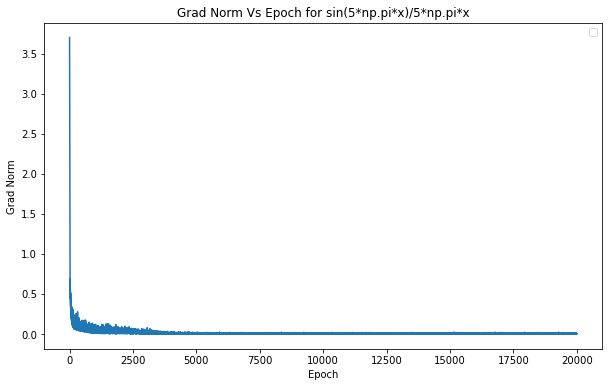

In [13]:
import matplotlib.pyplot as plt

plt_1 = plt.figure(figsize=(10, 6))

plt.title("Grad Norm Vs Epoch for sin(5*np.pi*x)/5*np.pi*x")

plt.plot(np.array(grad_norm), alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Grad Norm')
plt.legend()
 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


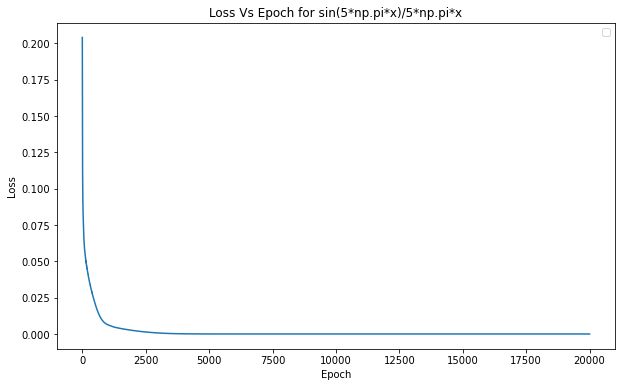

In [16]:
plt_1 = plt.figure(figsize=(10, 6))

plt.title("Loss Vs Epoch for sin(5*np.pi*x)/5*np.pi*x")

plt.plot(np.array(t_ls_1), alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

In [28]:
from torchvision import datasets, transforms

use_cuda = torch.cuda.is_available()
torch.manual_seed(1)

device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': 512}
test_kwargs = {'batch_size': 512}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

transform=transforms.Compose([
        transforms.ToTensor()
        #transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
dataset2 = datasets.MNIST('../data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

In [32]:
class CnnNet(nn.Module):
    def __init__(self):
        super(CnnNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output



In [33]:
def train( model, device, train_loader, optimizer,loss_fn, epoch):
    train_loss=0
    model.train()
    no_batches=0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        #print(data.shape)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        #train_loss.append(sum(loss.detach().cpu().numpy())/len(data))
        train_loss+=loss.item()
        no_batches+=1
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print("Epoch:", epoch, "sum loss:", train_loss, "batches", no_batches, "loss:", train_loss/no_batches,
         "accuracy:", 100. * correct / len(train_loader.dataset))  
    return train_loss/no_batches, 100. * correct / len(train_loader.dataset)

def returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch):
    train_loss=[]
    test_loss=[]
    accuracy_train=[]
    accuracy_test=[]
    grad_norm=[]
    for epoch in range(1, epoch+1):
        tr_loss, tr_accuracy=train(model, device, train_loader, optimizer, loss, epoch)
        train_loss.append(tr_loss)
        accuracy_train.append(tr_accuracy)
        grad_all=0
        for p in model.parameters():
            grad=0
            if p.grad is not None:
                grad=(p.grad.cpu().data.numpy()**2).sum()
            grad_all+=grad
            
        grad_norm.append(grad_all**0.5)

    return train_loss, accuracy_train, grad_norm

In [35]:
epoch=20
model = CnnNet().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=0.01)
loss = nn.CrossEntropyLoss()
t_ls_2, t_ac_2, grad_norm = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch )



#torch.save(model.state_dict(), "mnist_cnn.pt")
  

Epoch: 1 sum loss: 252.40793526172638 batches 118 loss: 2.13905029882819 accuracy: 37.35166666666667
Epoch: 2 sum loss: 149.8502937555313 batches 118 loss: 1.2699177436909432 accuracy: 67.48
Epoch: 3 sum loss: 89.27647575736046 batches 118 loss: 0.7565803030284785 accuracy: 77.14666666666666
Epoch: 4 sum loss: 72.82955041527748 batches 118 loss: 0.6171995797904871 accuracy: 81.28833333333333
Epoch: 5 sum loss: 64.14075011014938 batches 118 loss: 0.5435656788995711 accuracy: 83.47
Epoch: 6 sum loss: 58.76497194170952 batches 118 loss: 0.49800823679414846 accuracy: 85.01166666666667
Epoch: 7 sum loss: 55.236381858587265 batches 118 loss: 0.4681049310049768 accuracy: 85.765
Epoch: 8 sum loss: 52.32615078985691 batches 118 loss: 0.443441955846245 accuracy: 86.68
Epoch: 9 sum loss: 49.857709392905235 batches 118 loss: 0.422522960956824 accuracy: 87.32333333333334
Epoch: 10 sum loss: 47.7331628203392 batches 118 loss: 0.40451832898592543 accuracy: 87.89
Epoch: 11 sum loss: 45.81464236974716 

In [ ]:
import matplotlib.pyplot as plt

plt_1 = plt.figure(figsize=(10, 6))

plt.title("Grad Norm Vs Epoch for MNIST")

plt.plot(np.array(grad_norm), alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Grad Norm')
plt.legend()
 
plt.show()


In [ ]:
plt_1 = plt.figure(figsize=(10, 6))

plt.title("Loss Vs Epoch for MNIST")

plt.plot(np.array(t_ls_2), alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

In [ ]:
plt_1 = plt.figure(figsize=(10, 6))

plt.title("Accuracy Vs Epoch for MNIST")

plt.plot(np.array(t_ac_2), alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 
plt.show()